In [ ]:
import tensorflow
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
training_samples=[]
training_label=[]
for i in range(50):
  training_samples.append(random.randint(13, 65))
  training_label.append(1)

  training_samples.append(random.randint(65, 100))
  training_label.append(0)

for i in range(1000):
  training_samples.append(random.randint(13, 65))
  training_label.append(0)

  training_samples.append(random.randint(65, 100))
  training_label.append(1)

In [ ]:
training_samples=np.array(training_samples)
training_label=np.array(training_label)

training_samples, training_label=shuffle(training_samples, training_label)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(training_samples.reshape(-1,1))

In [ ]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model=keras.Sequential()

model.add(Dense(units=16, input_shape=(1,), activation='relu'))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
training_samples

array([ 81, 100,  99, ...,  13,  14,  48])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x=scaled_train_samples, y=training_label, batch_size=10, epochs=30, validation_split=0.2)

Epoch 1/30
168/168 [==============================] - 1s 4ms/step - loss: 0.5973 - accuracy: 0.6851 - val_loss: 0.4994 - val_accuracy: 0.8500
Epoch 2/30
168/168 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8863 - val_loss: 0.3247 - val_accuracy: 0.9310
Epoch 3/30
168/168 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.9214 - val_loss: 0.2765 - val_accuracy: 0.9310
Epoch 4/30
168/168 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9298 - val_loss: 0.2619 - val_accuracy: 0.9429
Epoch 5/30
168/168 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.9369 - val_loss: 0.2554 - val_accuracy: 0.9429
Epoch 6/30
168/168 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9375 - val_loss: 0.2486 - val_accuracy: 0.9310
Epoch 7/30
168/168 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9369 - val_loss: 0.2480 - val_accuracy: 0.9452
Epoch 

In [ ]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 13 197]]


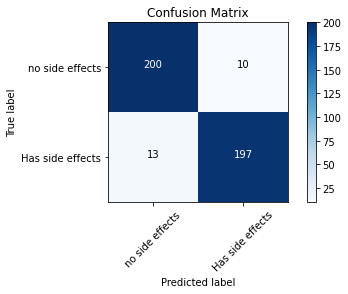

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm_plot_labels=["no side effects", "Has side effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [ ]:
model.save("Deep_Lizard1.h5")

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('Deep_Lizard1.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
